<a href="https://colab.research.google.com/github/KalaiselviNarendar/Machine-Learning/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded=files.upload()

Saving driver-data.csv to driver-data.csv


In [3]:
driver_df=pd.read_csv('driver-data.csv')
driver_df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [ ]:
# here ID is not used to create cluster

In [4]:
driver_df.drop('id',axis=1,inplace=True)

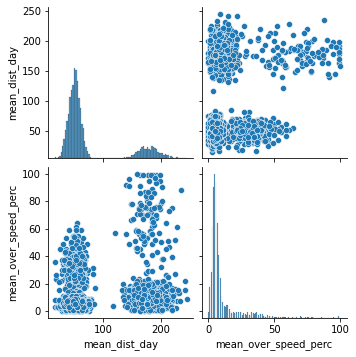

In [5]:
sns.pairplot(driver_df)
plt.show()

In [ ]:
#K means model

In [6]:
from sklearn.cluster import KMeans

In [7]:
kmeans_model=KMeans(n_clusters=2) #n_clusters parameter represeted the k value

In [8]:
kmeans_model.fit(driver_df)

KMeans(n_clusters=2)

In [9]:
# print(take a loof a the centoids values)

print(kmeans_model.cluster_centers_)

[[ 50.04763438   8.82875   ]
 [180.017075    18.29      ]]


In [10]:
print("cluster labels for the data points in the dataset:")
print(kmeans_model.labels_)

cluster labels for the data points in the dataset:
[0 0 0 ... 1 1 1]


In [11]:
driver_df['cluster labels']=kmeans_model.labels_
driver_df.head()

,mean_dist_day,mean_over_speed_perc,cluster labels
0,71.24,28,0
1,52.53,25,0
2,64.54,27,0
3,55.69,22,0
4,54.58,25,0


In [12]:
driver_df.tail()

,mean_dist_day,mean_over_speed_perc,cluster labels
3995,160.04,10,1
3996,176.17,5,1
3997,170.91,12,1
3998,176.14,5,1
3999,168.03,9,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


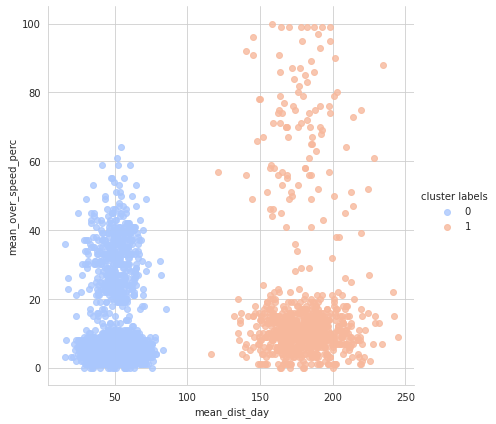

In [24]:
#visualize the cluster
sns.set_style("whitegrid")
sns.lmplot('mean_dist_day','mean_over_speed_perc',data=driver_df,hue='cluster labels',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)
plt.show()

In [25]:
#Elbow methos using WCSS

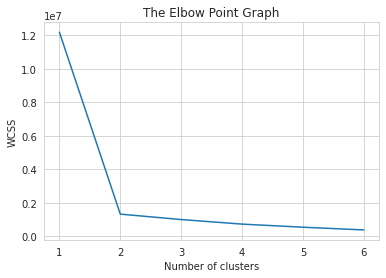

In [27]:
wcss=[]
for i in range(1,7):
  kmeans1=KMeans(n_clusters=i)
  kmeans1.fit(driver_df)
  #kmeans.inertia_ returns the WCSS value for an initialized cluster
  wcss.append(kmeans1.inertia_)

#Plotting The Elbow graph
plt.plot(range(1, 7), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
